# Notes: 

~ This notebook was started 4/2/25 in conjunction with a daily water flux .ipynb with the goal of finding total melt over all years observed in the Watson River dataset. It has since evolved to encompass temperature and water fluxes with the main goal being to analyzing temperature variations in conjuntion with discharge fluxes of the Watson River. Mainly during July 2012, and/or the 2012 season, though the years span the dataset as a whole ~

Power-law temperature dependence: Y = aT<sup>b
* Y = the property 
* T = Temp
* a = a constant* 
* b = the power or exponent

"describes how a physical property changes with temperature according to a mathematical function where the change in the property is proportional to a power of the temperature"

"meltwater runoff from the entire Watson River catchment can be estimated using a power law, in which Kangerlussuaq air temperature predicts Watson River discharge: Q = C × T3.4, where T is temperature above freezing and C is a constant." - Van As, D. (2018)

# tips:
* have all relevant information like tables, links, variable names, notes at top

# to do:
* edit code so that it doesn't overwrite the variables each time.
* check values
* start 4/2/25 to find total melt over all years observed
* only load the Watson river data set in one time
* Greenland blocking index: high values = more melt theoretically

# to plot:
* Greenland blocking index * Arctic Oscillation index * North Atlantic Oscillation index
* 5 years Daily water discharge from Watson River

# Setup:

In [273]:
# All packages and modules
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.colors as mcolors

In [363]:
# filepath
import os
print(os.getcwd())

/Users/anna/Library/CloudStorage/OneDrive-UCB-O365/ICECAPS


aliceblue
antiquewhite
aqua
aquamarine
azure
beige
bisque
black
blanchedalmond
blue
blueviolet
brown
burlywood
cadetblue
chartreuse
chocolate
coral
cornflowerblue
cornsilk
crimson
cyan
darkblue
darkcyan
darkgoldenrod
darkgray
darkgreen
darkgrey
darkkhaki
darkmagenta
darkolivegreen
darkorange
darkorchid
darkred
darksalmon
darkseagreen
darkslateblue
darkslategray
darkslategrey
darkturquoise
darkviolet
deeppink
deepskyblue
dimgray
dimgrey
dodgerblue
firebrick
floralwhite
forestgreen
fuchsia
gainsboro
ghostwhite
gold
goldenrod
gray
green
greenyellow
grey
honeydew
hotpink
indianred
indigo
ivory
khaki
lavender
lavenderblush
lawngreen
lemonchiffon
lightblue
lightcoral
lightcyan
lightgoldenrodyellow
lightgray
lightgreen
lightgrey
lightpink
lightsalmon
lightseagreen
lightskyblue
lightslategray
lightslategrey
lightsteelblue
lightyellow
lime
limegreen
linen
magenta
maroon
mediumaquamarine
mediumblue
mediumorchid
mediumpurple
mediumseagreen
mediumslateblue
mediumspringgreen
mediumturquoise
mediumv

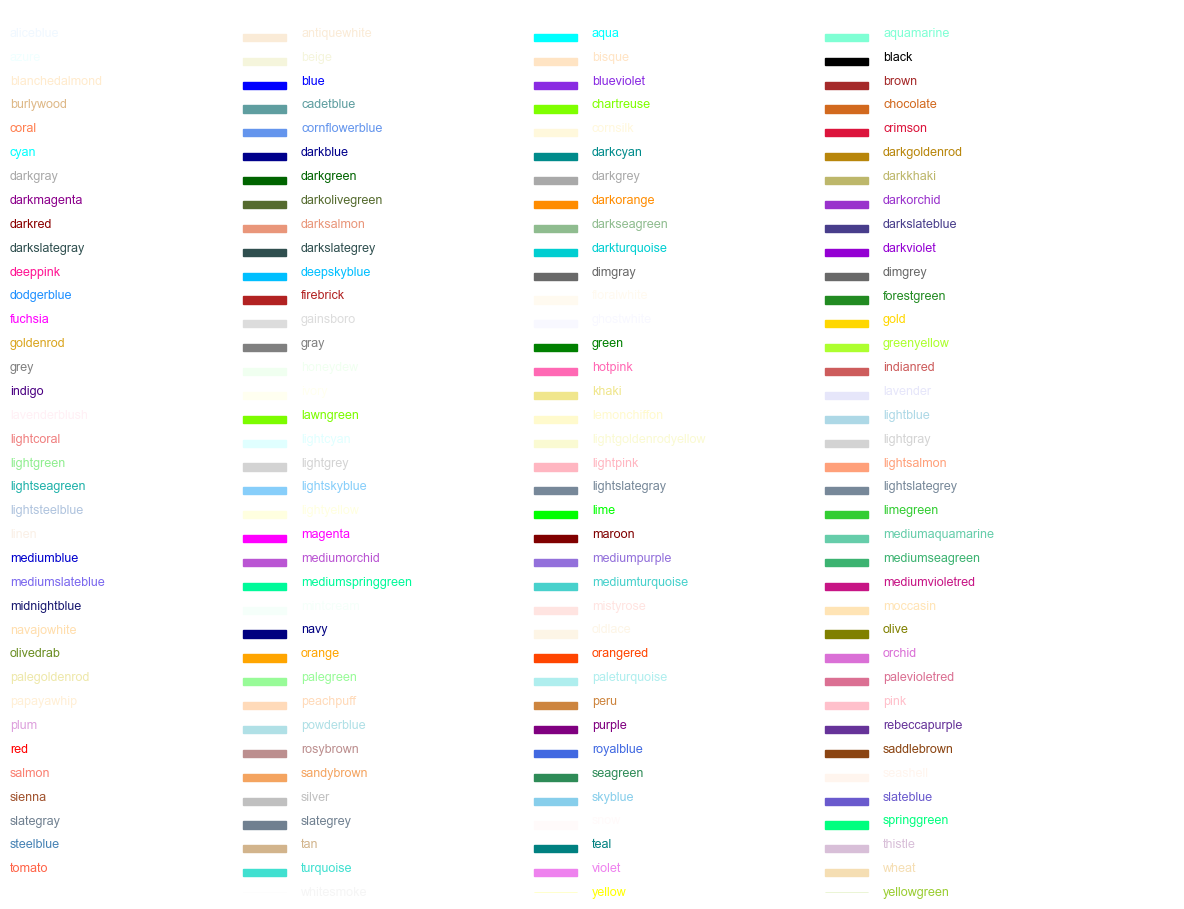

In [275]:
# All plot colors
colors = dict(mcolors.CSS4_COLORS)  # You can also try mcolors.TABLEAU_COLORS or BASE_COLORS

# Print all color names
for name in colors:
    print(name)

# Optional: Show color swatches
n = len(colors)
ncols = 4
nrows = (n + ncols - 1) // ncols
fig, ax = plt.subplots(figsize=(12, nrows * 0.25))
ax.set_xlim(0, ncols)
ax.set_ylim(0, nrows)
ax.axis("off")

for i, (name, hex) in enumerate(colors.items()):
    row = i // ncols
    col = i % ncols
    y = nrows - row - 1
    ax.text(col, y, name, fontsize=9, ha="left", va="center", color=hex)
    ax.add_patch(plt.Rectangle((col - 0.2, y - 0.3), 0.15, 0.3, color=hex))

plt.tight_layout()
plt.show()

In [276]:
# Watson River File
# I changed this by seperating it by commas but I think pandas automatically seperates it by commas so did I need to seperate on commas?
file_path = "Watson_River_discharge_(2006-2023)_hourly.csv"
df = pd.read_csv(file_path)

In [277]:
# Watson River Columns
df.columns

Index(['Year', 'MonthOfYear', 'DayOfMonth', 'HourOfDay(UTC)', 'DayOfYear',
       'DayOfCentury', 'WaterFluxDiversOnly(m3/s)', 'Uncertainty(m3/s)',
       'WaterFluxDivers&Temperature(m3/s)', 'Uncertainty(m3/s).1',
       'WaterFluxCumulative(km3)', 'Uncertainty(km3)'],
      dtype='object')

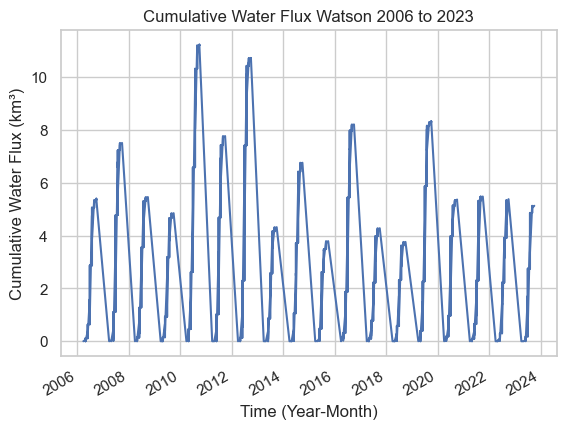

In [279]:
# Create a Year-Month column
df['Year-Month'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['MonthOfYear'].astype(str).str.zfill(2) + '-01')

# Sort data to ensure proper comparison
df = df.sort_values(by=['Year-Month'])

df = df.set_index('Year-Month')
df['WaterFluxCumulative(km3)'].plot()
plt.xlabel('Time (Year-Month)')
plt.ylabel('Cumulative Water Flux (km³)')
plt.title('Cumulative Water Flux Watson 2006 to 2023')
plt.show()

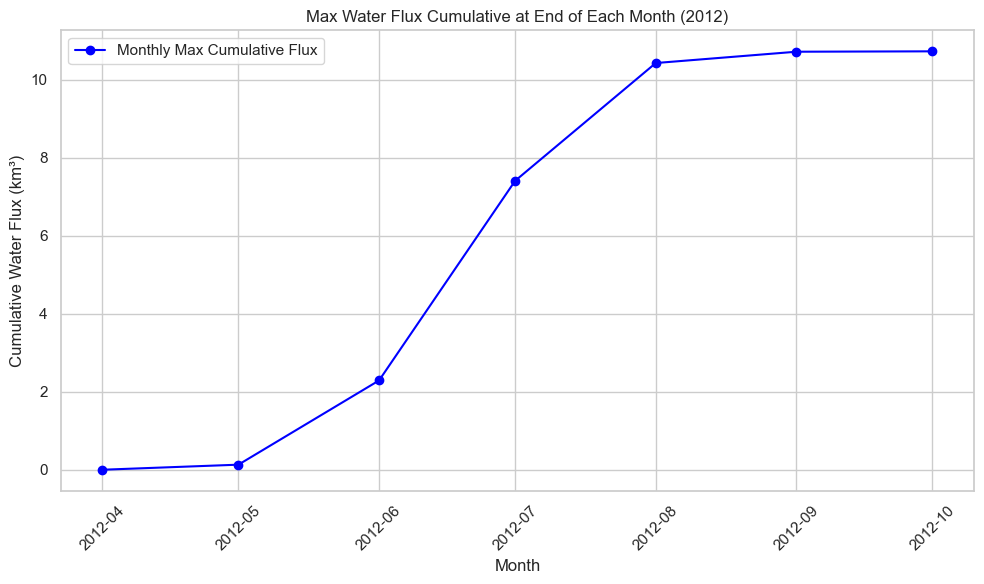

In [282]:
# Filter for the year 2012
df_2012 = df[df['Year'] == 2012].copy()

# Create a datetime column
df_2012['datetime'] = pd.to_datetime(df_2012[['Year', 'MonthOfYear', 'DayOfMonth']].rename(
    columns={'MonthOfYear': 'month', 'DayOfMonth': 'day'}
).assign(hour=df_2012['HourOfDay(UTC)']), errors='coerce')

# Create a Time column for grouping
df_2012['Month'] = df_2012['datetime'].dt.to_period('M').dt.to_timestamp()

# Group by Time and take the max cumulative water flux
monthly_max = df_2012.groupby('Month', as_index=False)['WaterFluxCumulative(km3)'].max()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_max['Month'], monthly_max['WaterFluxCumulative(km3)'],
         marker='o', linestyle='-', color='blue', label='Monthly Max Cumulative Flux')

plt.xlabel("Month")
plt.ylabel("Cumulative Water Flux (km³)")
plt.title("Max Water Flux Cumulative at End of Each Month (2012)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

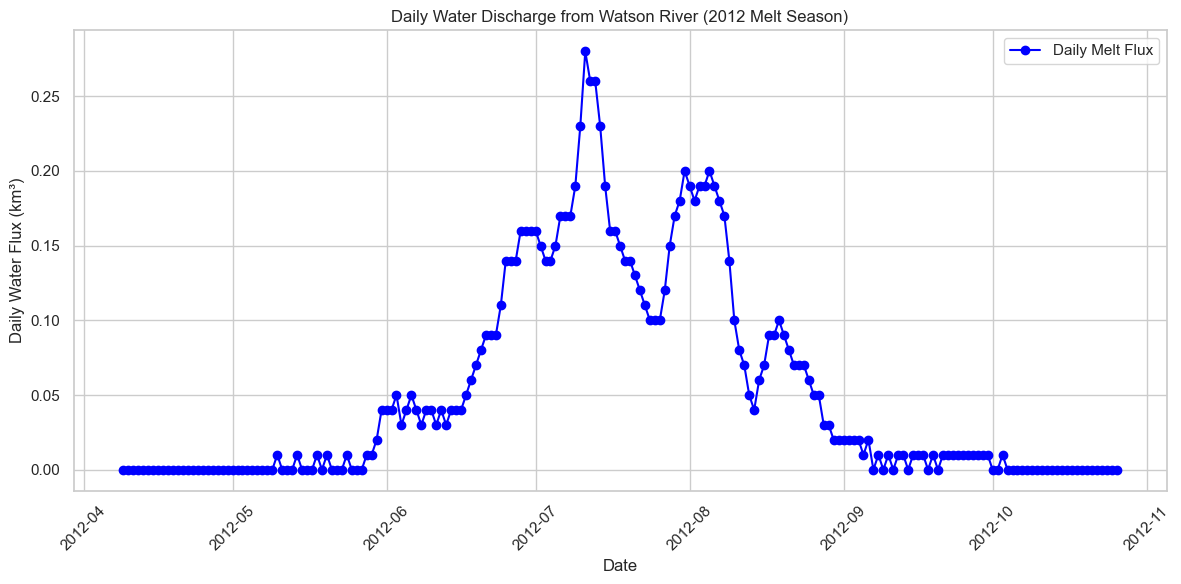

In [283]:
# Plot daily fluxes
plt.figure(figsize=(12, 6))
plt.plot(daily_flux_df['Date'], daily_flux_df['DailyFlux(km3)'], 
         marker='o', linestyle='-', color='blue', label='Daily Melt Flux')

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Daily Water Flux (km³)")
plt.title("Daily Water Discharge from Watson River (2012 Melt Season)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

In [285]:
num_days_2012 = df[df['Year'] == 2012][['Year', 'MonthOfYear', 'DayOfMonth']].drop_duplicates().shape[0]
print(num_days_2012)

from datetime import date

start = date(2012, 5, 10)
end = date(2012, 10, 3)

days_between = (end - start).days
print(f"Days between: {days_between}")

total_flux_km3 = 10.73
num_days = 146

average_daily_flux = total_flux_km3 / num_days
print(f"Average daily water flux: {average_daily_flux:.4f} km³/day")

201
Days between: 146
Average daily water flux: 0.0735 km³/day


In [287]:
# I didn't really check that these values were all correct
# Load the dataset
file_path = "Watson_River_discharge_(2006-2023)_hourly.csv"
df = pd.read_csv(file_path)

# Create datetime column from year, month, day, and hour
df['Datetime'] = pd.to_datetime(df[['Year', 'MonthOfYear', 'DayOfMonth']].rename(
    columns={'MonthOfYear': 'month', 'DayOfMonth': 'day'}
).assign(hour=df['HourOfDay(UTC)']), errors='coerce')

# Create a date-only column
df['Date'] = df['Datetime'].dt.date

# Filter for 2012 melt season: April 9 to October 26
mask = (df['Date'] >= pd.to_datetime("2012-04-09").date()) & (df['Date'] <= pd.to_datetime("2012-10-26").date())
df_season = df[mask].copy()

# Group by each day, take the max cumulative water flux
daily_max_flux = df_season.groupby('Date')['WaterFluxCumulative(km3)'].max()

# Compute daily flux as difference from previous day's max
daily_flux = daily_max_flux.diff().fillna(0)

# Create final DataFrame
daily_flux_df = daily_flux.reset_index()
daily_flux_df.columns = ['Date', 'DailyFlux(km3)']

# Show results
print(daily_flux_df.head())

         Date  DailyFlux(km3)
0  2012-04-09             0.0
1  2012-04-10             0.0
2  2012-04-11             0.0
3  2012-04-12             0.0
4  2012-04-13             0.0


In [288]:
MaxFlux = daily_flux_df['DailyFlux(km3)'].max()
print("Maximum non-zero daily flux:", MaxFlux, "km³")

max_flux = daily_flux_df['DailyFlux(km3)'].max()
print("Maximum daily flux:", max_flux, "km³")

Maximum non-zero daily flux: 0.28000000000000025 km³
Maximum daily flux: 0.28000000000000025 km³


In [291]:
# df columns
print(daily_flux_df.columns)

Index(['Date', 'DailyFlux(km3)'], dtype='object')


In [295]:
pd.set_option('display.max_rows', None)
print(daily_flux_table.to_string(index=False))

NameError: name 'daily_flux_table' is not defined

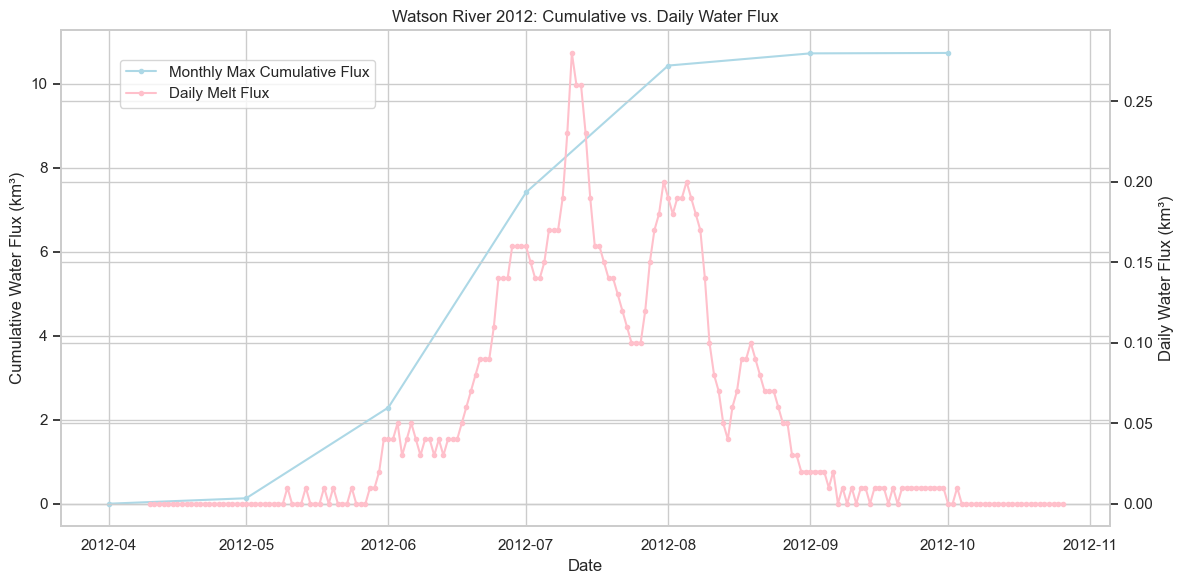

In [297]:
# Load the dataset
file_path = "Watson_River_discharge_(2006-2023)_hourly.csv"
df = pd.read_csv(file_path)

# Filter for the year 2012
df_2012 = df[df['Year'] == 2012].copy()

# Create a datetime column
df_2012['Datetime'] = pd.to_datetime(df_2012[['Year', 'MonthOfYear', 'DayOfMonth']].rename(
    columns={'MonthOfYear': 'month', 'DayOfMonth': 'day'}
).assign(hour=df_2012['HourOfDay(UTC)']), errors='coerce')

# Create a Year-Month column for grouping
df_2012['Year-Month'] = df_2012['Datetime'].dt.to_period('M').dt.to_timestamp()

# Group by Year-Month and take the max cumulative water flux
monthly_max = df_2012.groupby('Year-Month', as_index=False)['WaterFluxCumulative(km3)'].max()

# Compute daily flux
df_2012['Date'] = df_2012['Datetime'].dt.date
daily_flux_df = df_2012.groupby('Date')['WaterFluxCumulative(km3)'].max().diff().reset_index()
daily_flux_df.columns = ['Date', 'DailyFlux(km3)']
daily_flux_df = daily_flux_df.dropna()

# Plot both on dual y-axis
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()
ax2 = ax.twinx()

# Left y-axis: cumulative water flux
ax.plot(monthly_max['Year-Month'], monthly_max['WaterFluxCumulative(km3)'],
        marker='.', linestyle='-', color='lightblue', label='Monthly Max Cumulative Flux')
ax.set_ylabel("Cumulative Water Flux (km³)")
ax.set_xlabel("Date")

# Right y-axis: daily flux
ax2.plot(daily_flux_df['Date'], daily_flux_df['DailyFlux(km3)'],
         marker='.', linestyle='-', color='pink', label='Daily Melt Flux')
ax2.set_ylabel("Daily Water Flux (km³)")

# Add title and formatting
plt.title("Watson River 2012: Cumulative vs. Daily Water Flux")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()

Round 1: * Of the 2012 season, 201 days were observed in this dataset. Of those 201 days, we saw increases in water flux during 146 days. Though the dataset starts it's date count at 4/9, the water flux didn't start increasing until 5/10. 55 days of the 2012 observed season had 0.00 values for daily water flux, bookending the start and end dates for the season. It's unclear if this lack of increase during observation represents the amount of water moving through the system or if it might be due to insrument sensativity or data resolution. We can check other field seasons to verify if this is a trend in the data and/or compare this set to other datasets of the Watson River water fluxes during those same times.
  
For the 146 days where water flux increases were observed, the average daily flux was .0735 km3/day. When we include all observed days where flux vlaues were 0.00 the daily average was .0533 km3/day. This daily water flux range varies widely from 0.010 to 0.28 km³ per day. We saw the maximum water flux  on 7/11 which coincides with the bridge washout. We observed two major peaks in water flux during the 2012 season. The first from 6/24 to 7/13, meaning that there were increasing water flux measurements for 17 days before the bridge washout. 
The second major discharge event was observed from 7/27 to 8/9, and a third less prominent event from 8/14 to 8/19. 

Questions: 
* What are the min and max values of observed water flux changes day to day. What's the range in the amount of melt observed each day?
* In the time when there are not increases in water flux is the Watson River still flowing or is the lack in increase just due to how they're gathering data?
* Uncertainty also increases and decreases at the beginning and end of the season

Compared water flux each year. 

In [301]:
# ?
min_flux = daily_flux_df['DailyFlux(km3)'].min()
max_flux = daily_flux_df['DailyFlux(km3)'].max()
print(f"Least daily melt: {min_flux:.4f} km³, Most daily melt: {max_flux:.4f} km³")

Least daily melt: 0.0000 km³, Most daily melt: 0.2800 km³


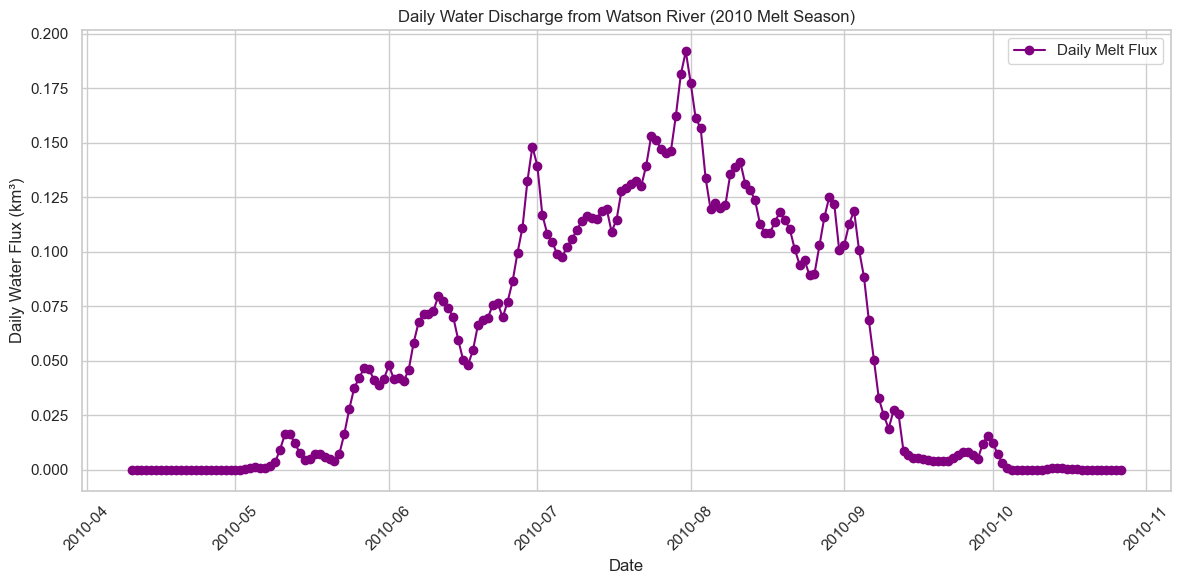

In [303]:
# Load the dataset
file_path = "Watson_River_discharge_(2006-2023)_hourly.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Rename columns for datetime conversion
df.rename(columns={
    'MonthOfYear': 'Month',
    'DayOfMonth': 'Day',
    'HourOfDay(UTC)': 'Hour'
}, inplace=True)

# Create a datetime column
df['DateTime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])

# Filter for the year 2010
df_2010 = df[df['Year'] == 2010].copy()

# Set datetime as index
df_2010.set_index('DateTime', inplace=True)

# Calculate daily total flux in km³
df_2010['DailyFlux(km3)'] = (df_2010['WaterFluxDivers&Temperature(m3/s)'] * 3600).resample('D').sum() / 1e9

# Drop NaN values
daily_flux_2010 = df_2010[['DailyFlux(km3)']].dropna().reset_index()

# Plot the daily flux
plt.figure(figsize=(12, 6))
plt.plot(daily_flux_2010['DateTime'], daily_flux_2010['DailyFlux(km3)'], 
         marker='o', linestyle='-', color='purple', label='Daily Melt Flux')

# Add labels and formatting
plt.xlabel("Date")
plt.ylabel("Daily Water Flux (km³)")
plt.title("Daily Water Discharge from Watson River (2010 Melt Season)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

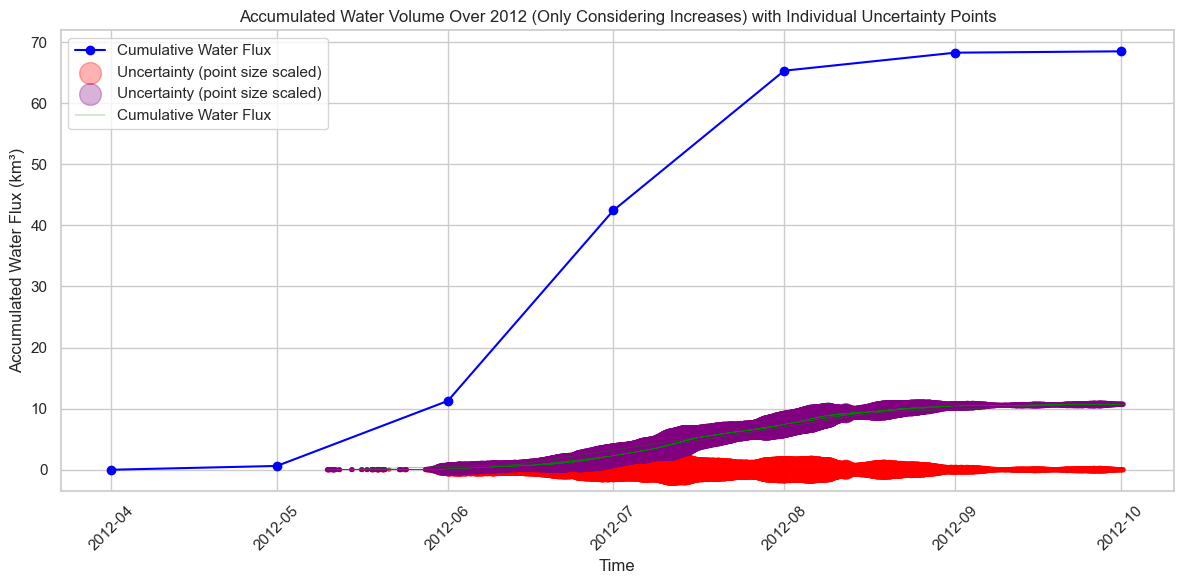

In [304]:
# *** get correct numbers and replot *****
# the max for this plot should be 10.73km3 not 70km3

# Load the dataset
file_path = "Watson_River_discharge_(2006-2023)_hourly.csv"
df = pd.read_csv(file_path)

# Filter for the year 2012
df_2012 = df[df['Year'] == 2012].copy()

# Create a datetime column from Year, Month, Day, and Hour
df_2012['Datetime'] = pd.to_datetime(df_2012[['Year', 'MonthOfYear', 'DayOfMonth']].rename(
    columns={'MonthOfYear': 'month', 'DayOfMonth': 'day'}
).assign(hour=df_2012['HourOfDay(UTC)']), errors='coerce')

# Create a Year-Month column
df_2012['Year-Month'] = pd.to_datetime(df_2012[['Year', 'MonthOfYear']].astype(str).agg('-'.join, axis=1) + '-01')

# Sort data
df_2012 = df_2012.sort_values(by='Year-Month')

# Compute increments in WaterFluxCumulative(km3), only counting increases
df_2012['Increment'] = df_2012['WaterFluxCumulative(km3)'].diff().clip(lower=0)

# Group by Year-Month and sum only the increasing increments
monthly_data = df_2012.groupby('Year-Month', as_index=False)['Increment'].sum()

# Calculate cumulative sum
monthly_data['Cumulative_WaterFlux(km3)'] = monthly_data['Increment'].cumsum()

# Plotting
plt.figure(figsize=(12, 6))

# Plot cumulative line
plt.plot(monthly_data['Year-Month'], monthly_data['Cumulative_WaterFlux(km3)'],
         marker='o', linestyle='-', color='blue', label='Cumulative Water Flux')

# Plot uncertainty as individual points if column exists
if 'Uncertainty(m3/s)' in df_2012.columns:
    uncertainty_points = df_2012[df_2012['Uncertainty(m3/s)'] > 0]
    plt.scatter(uncertainty_points['Datetime'], [0] * len(uncertainty_points),
                s=uncertainty_points['Uncertainty(m3/s)'], color='red', alpha=0.3,
                label='Uncertainty (point size scaled)')


    uncertainty_points = df_2012[df_2012['Uncertainty(m3/s)'] > 0]
    plt.scatter(uncertainty_points['Datetime'], df_2012[df_2012['Uncertainty(m3/s)'] > 0]['WaterFluxCumulative(km3)'],
                s=uncertainty_points['Uncertainty(m3/s)'], color='purple', alpha=0.3,
                label='Uncertainty (point size scaled)')


plt.plot(df_2012[df_2012['Uncertainty(m3/s)'] > 0]['Datetime'],
         df_2012[df_2012['Uncertainty(m3/s)'] > 0]['WaterFluxCumulative(km3)'],
         linestyle='-', color='green', label='Cumulative Water Flux', lw=0.26)
# Formatting
plt.xlabel("Time")
plt.ylabel("Accumulated Water Flux (km³)")
plt.title("Accumulated Water Volume Over 2012 (Only Considering Increases) with Individual Uncertainty Points")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [306]:
# watson column names
print(df.columns)

Index(['Year', 'MonthOfYear', 'DayOfMonth', 'HourOfDay(UTC)', 'DayOfYear',
       'DayOfCentury', 'WaterFluxDiversOnly(m3/s)', 'Uncertainty(m3/s)',
       'WaterFluxDivers&Temperature(m3/s)', 'Uncertainty(m3/s).1',
       'WaterFluxCumulative(km3)', 'Uncertainty(km3)'],
      dtype='object')


In [307]:
# KAN_U Column names
print(ds.data_vars)

Data variables:
    rec                    (time) float64 ...
    p_u                    (time) float64 ...
    t_u                    (time) float64 -23.43 -23.87 -23.92 ... nan nan nan
    rh_u                   (time) float64 ...
    rh_u_wrt_ice_or_water  (time) float64 ...
    wspd_u                 (time) float64 ...
    wdir_u                 (time) float64 ...
    wdir_std_u             (time) float64 ...
    wspd_x_u               (time) float64 ...
    wspd_y_u               (time) float64 ...
    dsr                    (time) float64 ...
    dsr_cor                (time) float64 ...
    usr                    (time) float64 ...
    usr_cor                (time) float64 ...
    albedo                 (time) float64 nan nan nan nan ... nan nan nan nan
    dlr                    (time) float64 ...
    ulr                    (time) float64 ...
    cc                     (time) float64 ...
    t_surf                 (time) float64 ...
    z_boom_u               (time) float64 ...

In [308]:
# Load the KAN_U dataset
ds = xr.open_dataset("KAN_U_10min.nc")

# View the dataset summary
print(ds)


<xarray.Dataset>
Dimensions:                (time: 796545)
Coordinates:
  * time                   (time) datetime64[ns] 2009-04-04T21:40:00 ... 2024...
Data variables: (12/54)
    rec                    (time) float64 ...
    p_u                    (time) float64 ...
    t_u                    (time) float64 ...
    rh_u                   (time) float64 ...
    rh_u_wrt_ice_or_water  (time) float64 ...
    wspd_u                 (time) float64 ...
    ...                     ...
    t_rad                  (time) float64 ...
    p_i                    (time) float64 ...
    t_i                    (time) float64 ...
    rh_i                   (time) float64 ...
    wspd_i                 (time) float64 ...
    wdir_i                 (time) float64 ...
Attributes: (12/78)
    level:                           L2
    number_of_booms:                 1
    format:                          raw
    latitude:                        67.00039073851839
    longitude:                       -47.025

Total melt loss over all years: 113.76 km³


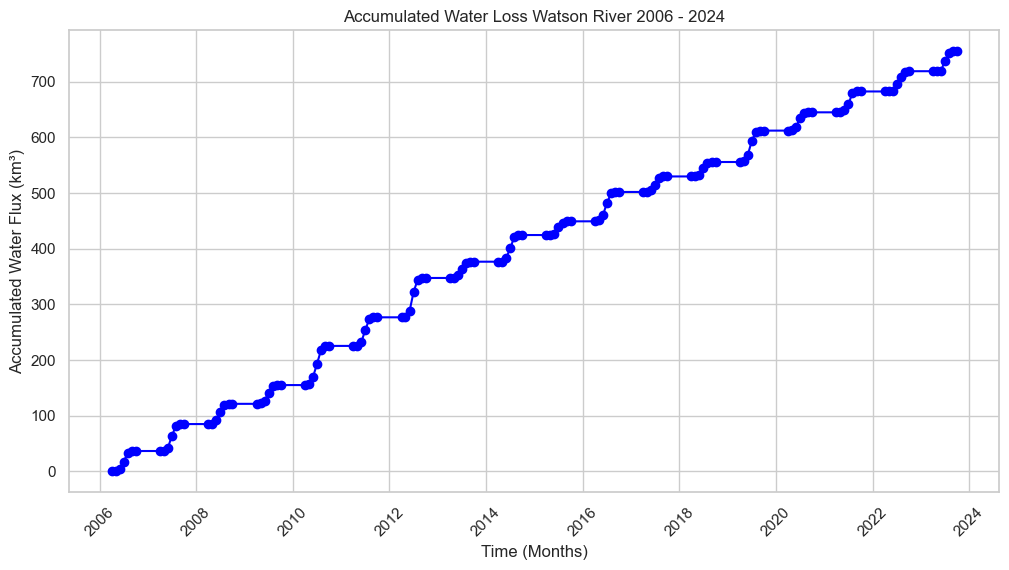

In [313]:
# ***** Get correct numbers *****
# total water loss from Watson River 2006 to 2024

# Create a Year-Month column
df['Year-Month'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['MonthOfYear'].astype(str).str.zfill(2) + '-01')

# Sort data to ensure proper comparison
df = df.sort_values(by=['Year-Month'])

# Compute increments in WaterFluxCumulative(km3)
df['Increment'] = df['WaterFluxCumulative(km3)'].diff().clip(lower=0)  # Only count increases

# Group by Year-Month and sum the increments
monthly_data = df.groupby('Year-Month')['Increment'].sum().reset_index()

# Calculate cumulative sum of only increasing values
monthly_data['Cumulative_WaterFlux(km3)'] = monthly_data['Increment'].cumsum()

# Find the maximum cumulative water flux for each year
yearly_max = df.groupby('Year')['WaterFluxCumulative(km3)'].max()

# Calculate total melt loss over all years
total_melt_loss = yearly_max.sum()
print(f"Total melt loss over all years: {total_melt_loss:.2f} km³")

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Year-Month'], monthly_data['Cumulative_WaterFlux(km3)'], marker='o', linestyle='-', color='blue')

# Formatting the plot
plt.xlabel("Time (Months)")
plt.ylabel("Accumulated Water Flux (km³)")
plt.title("Accumulated Water Loss Watson River 2006 - 2024")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.show()


... plotting 2006
... plotting 2007
... plotting 2008
... plotting 2009
... plotting 2010
... plotting 2011
... plotting 2012
... plotting 2013
... plotting 2014
... plotting 2015
... plotting 2016
... plotting 2017
... plotting 2018
... plotting 2019
... plotting 2020
... plotting 2021
... plotting 2022
... plotting 2023


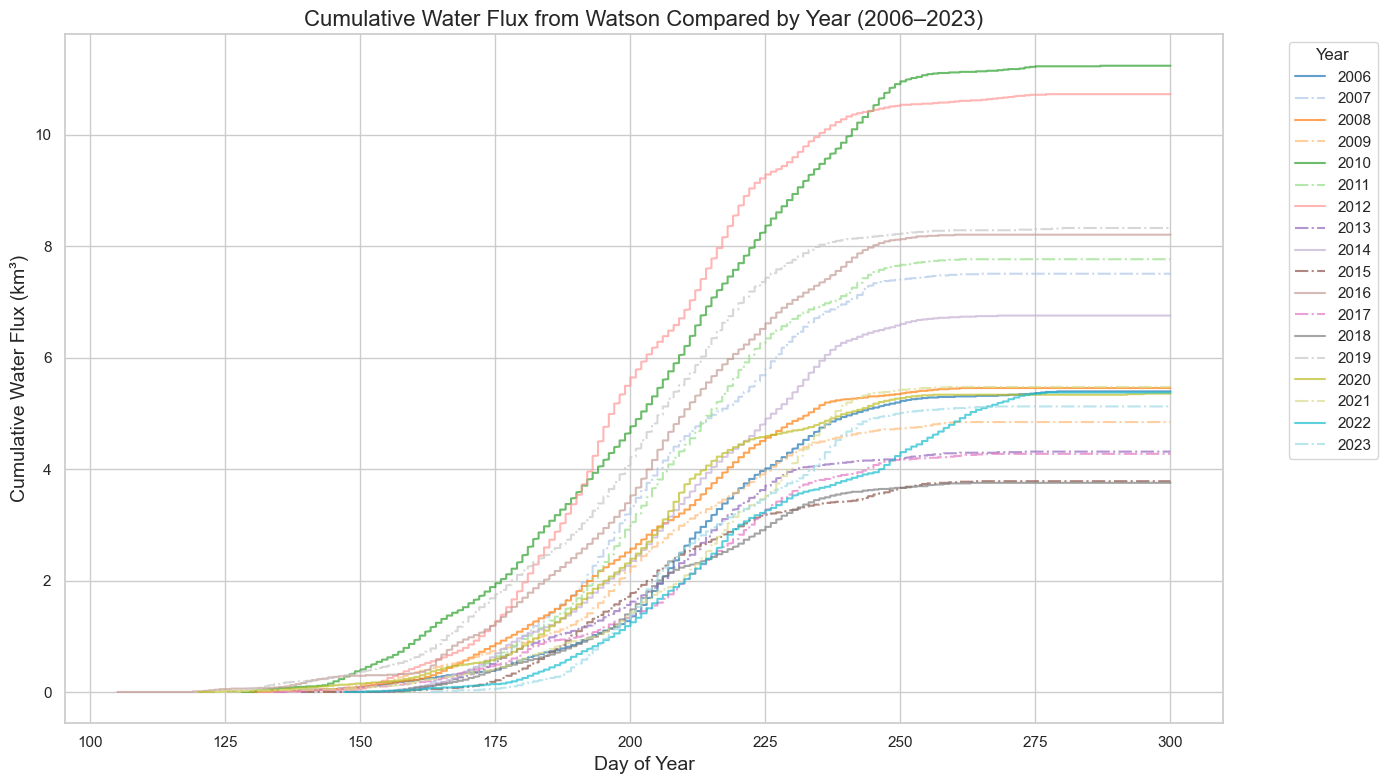

In [314]:
# 1. Import the modules
# It had matplotlib imported here vs matplotlib.pyplot, why?
# 2. Load the dataset
file_path = 'Watson_River_discharge_(2006-2023)_hourly.csv'
df = pd.read_csv(file_path) 

# 3. Make sure you have the correct data. ie filtered out invalid or missing cumulative water flux data
df_filtered = df[df['WaterFluxCumulative(km3)'] > 0]
# A; so this is creating another variable of filtered data. Could combine this line with the next line

# 4. choose the columns you want to work with
vars_to_keep = ['Year', 'DayOfYear', 'WaterFluxCumulative(km3)']
df_plot = df_filtered[vars_to_keep]
# you need two sets of brackets becasue you're accessing multiple columns

# 5. Initialize the plot
plt.figure(figsize=(14, 8)) #picking your canvas size
sns.set(style="whitegrid") #choosing the look
# You can also use styles like darkgrid, white, or ticks. Make sure you're using the correct module

# 6. Plot cumulative flux for each year
plot_years = [i for i in range(2006,2024)]

# 7. Take colors at regular intervals spanning the colormap.
cmap = mpl.colormaps['tab20']
colors = cmap(np.linspace(0, 1, len(plot_years)))

iyear = 0            
for year, group in df_plot.groupby('Year'):
    #print(year, group)
    
    if year in plot_years: 
        print(f"... plotting {year}")
        if iyear %2 == 0: linestyle = '-'
        else: linestyle='-.'
        plt.plot(group['DayOfYear'], group['WaterFluxCumulative(km3)'],
                 color=colors[iyear], label=str(year), alpha=0.7, linestyle=linestyle)
        
    #In Python, when you do something like this:
    # for x, y in some_iterable:
    # …it means that each item in some_iterable is a tuple of two values, and you're unpacking the tuple into x and y.
    # A; so they're sort of grouped together like ((x,y),(x,y),(x,y)...)
    iyear+=1

# Plot formatting
plt.title('Cumulative Water Flux from Watson Compared by Year (2006–2023)', fontsize=16)
plt.xlabel('Day of Year', fontsize=14)
plt.ylabel('Cumulative Water Flux (km³)', fontsize=14)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
# how does python know what "upper left" and "group" mean? is that just part of the module?
plt.tight_layout() # what is a plot element? just the titles and everything?
plt.grid(True)

plt.show()

Cumulative Water Flux from Watson Compared by Year (2006-2023): 
* 2010 highest cumulative discharge year
* 2012 was next
* 2019
Would be interesting to se synoptic patterns for these years and how they relate to discharge

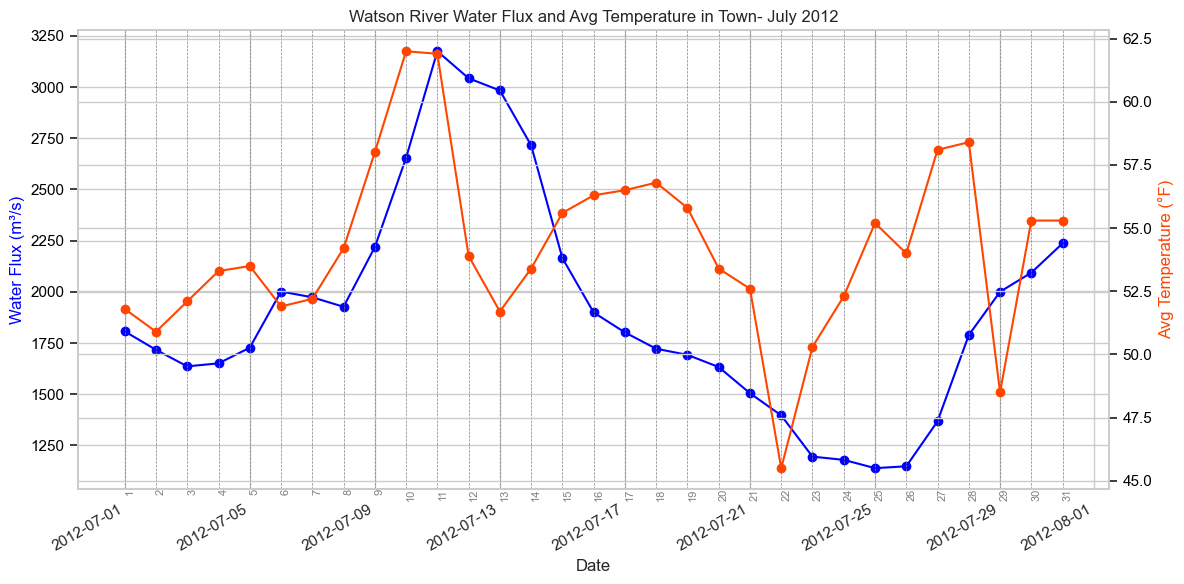

In [318]:
# July 2012 Temperatures matched with Daily Mean Water Flux Watson River 
# https://www.wunderground.com/history/monthly/gl/kangerlussuaq/BGSF/date/2012-7 Jul 2012 temps data

# --- 1. Load Watson River data and prepare flux ---
watson_file = "Watson_River_discharge_(2006-2023)_hourly.csv"
df = pd.read_csv(watson_file)

# Filter for July 2012
#july_2012 = df[(df['Year'] == 2012) & (df['MonthOfYear'] == 7)].copy()
july_2012 = df[(df['Year'] == 2012) & ((df['MonthOfYear'] == 6)|(df['MonthOfYear'] == 7)|(df['MonthOfYear'] == 8))].copy()

# Create Timestamp
july_2012['Timestamp'] = pd.to_datetime(july_2012[['Year', 'MonthOfYear', 'DayOfMonth']].astype(str).agg('-'.join, axis=1)
                                        + ' ' + july_2012['HourOfDay(UTC)'].astype(str) + ':00')
july_2012.set_index('Timestamp', inplace=True)

# Resample to daily mean water flux
daily_flux = july_2012['WaterFluxDiversOnly(m3/s)'].resample('D').mean().reset_index()

# --- 2. Load weather data and prepare temperature ---
weather_file = "july_2012_Kanger_weather_data.csv"
weather_df = pd.read_csv(weather_file)

# Add year and parse dates
weather_df['Date'] = weather_df['Date'].astype(str) + ' 2012'
weather_df['Date'] = pd.to_datetime(weather_df['Date'], format='%b %d %Y')

# Keep only needed columns
weather_df = weather_df[['Date', 'Temperature Avg (°F)']].copy()
weather_df.rename(columns={'Temperature Avg (°F)': 'AvgTemp(F)'}, inplace=True)

# --- 3. Merge and plot ---
merged = pd.merge(daily_flux, weather_df, left_on='Timestamp', right_on='Date')

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot water flux
ax1.plot(merged['Timestamp'], merged['WaterFluxDiversOnly(m3/s)'], color='blue', label='Water Flux (m³/s)', marker='o')
ax1.set_xlabel('Date')
ax1.set_ylabel('Water Flux (m³/s)', color='blue')
ax1.tick_params(axis='y', labelcolor='black')

# Plot temperature on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(merged['Timestamp'], merged['AvgTemp(F)'], color='orangered', label='Avg Temp (°F)', linestyle='-', marker='o')
ax2.set_ylabel('Avg Temperature (°F)', color='orangered')
ax2.tick_params(axis='y', labelcolor='black')

# Add vertical lines and labels for each day, with labels below the lines
for date in merged['Timestamp']:
    ax1.axvline(date, color='gray', linestyle='--', linewidth=0.5)
    ax1.text(date, ax1.get_ylim()[0] - 0.05, f'{date.day}', rotation=90, verticalalignment='top', fontsize=8, color='gray')

# Title and formatting
plt.title("Watson River Water Flux and Avg Temperature in Town- July 2012")
fig.autofmt_xdate()
plt.grid(True)
plt.tight_layout()
plt.show()

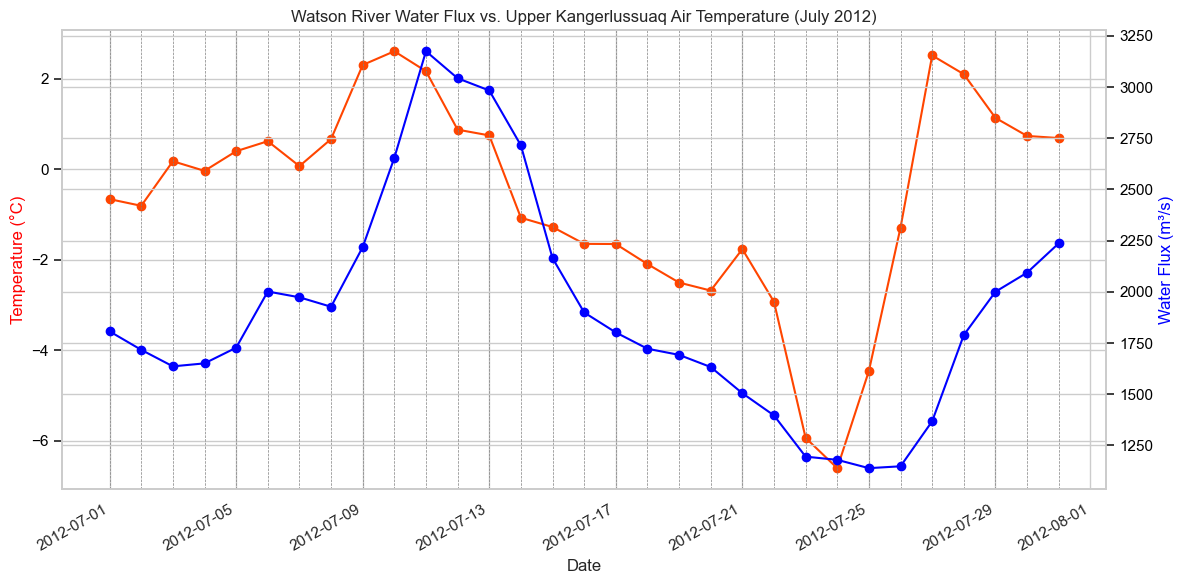

In [351]:
# upper kanger temperature and waterflux divers 

# --- Load Watson River discharge data ---
watson_file = "Watson_River_discharge_(2006-2023)_hourly.csv"
df = pd.read_csv(watson_file)

# Filter for July 2012
july_flux = df[(df['Year'] == 2012) & (df['MonthOfYear'] == 7)].copy()

# Create datetime index
july_flux['Timestamp'] = pd.to_datetime(
    july_flux[['Year', 'MonthOfYear', 'DayOfMonth']].astype(str).agg('-'.join, axis=1)
    + ' ' + july_flux['HourOfDay(UTC)'].astype(str) + ':00'
)
july_flux.set_index('Timestamp', inplace=True)

# Resample to daily mean water flux
daily_flux = july_flux['WaterFluxDiversOnly(m3/s)'].resample('D').mean()

# --- Load AWS data and compute daily average temperature ---
july_2012 = udf['2012-07-01':'2012-07-31']
daily_avg_temp = july_2012.resample('D').mean()

# --- Plotting with dual y-axes ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature
ax1.plot(daily_avg_temp.index, daily_avg_temp['t_u'], marker='o', linestyle='-', color='orangered', label='Temperature (°C)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='red')
ax1.tick_params(axis='y', labelcolor='black')

for date in daily_avg_temp.index:
    ax1.axvline(date, color='gray', linestyle='--', linewidth=0.5)
    
# Create secondary y-axis for water flux
ax2 = ax1.twinx()
ax2.plot(daily_flux.index, daily_flux, marker='o', linestyle='-', color='blue', label='Water Flux (m³/s)')
ax2.set_ylabel('Water Flux (m³/s)', color='blue')
ax2.tick_params(axis='y', labelcolor='black')

# Title and formatting
plt.title('Watson River Water Flux vs. Upper Kangerlussuaq Air Temperature (July 2012)')
fig.autofmt_xdate()
plt.grid(True)
plt.tight_layout()
plt.show()

Watson River Water Flux vs. Kangerlussuaq Air Temp: 
* Correlation between sustained temperatures above 0 degrees and increased water flux
* There was a ~7 day sustained streak where the temperatures were above 0 degrees C. We saw the discharge increase around 6 days after the start of the sustained warmer temperatures 

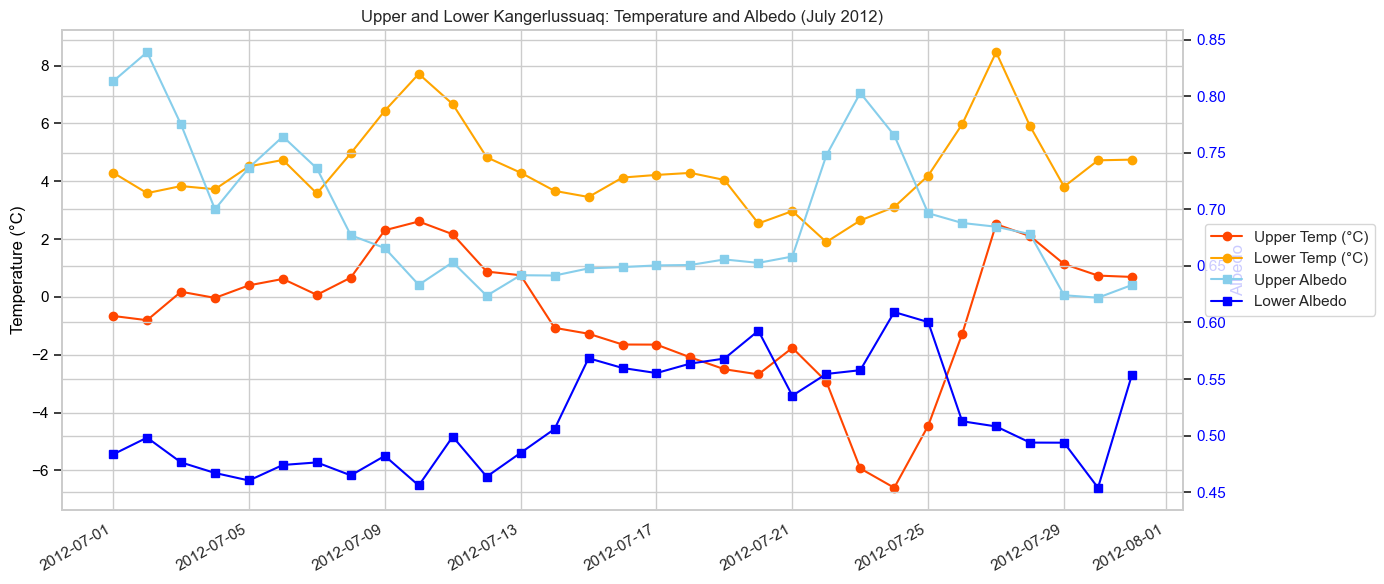

In [365]:
# Calculate daily average temperature and albedo for both upper and lower sites

# Ensure daily averages are defined
daily_avg_temp_u = udf['2012-07-01':'2012-07-31'].resample('D').mean()
daily_avg_temp_l = ldf['2012-07-01':'2012-07-31'].resample('D').mean()

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot temperature from upper and lower
temp_u_plot = ax1.plot(daily_avg_temp_u.index, daily_avg_temp_u['t_u'], label='Upper Temp (°C)', color='orangered', marker='o')
temp_l_plot = ax1.plot(daily_avg_temp_l.index, daily_avg_temp_l['t_u'], label='Lower Temp (°C)', color='orange', marker='o')
ax1.set_ylabel('Temperature (°C)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create secondary y-axis for albedo
ax2 = ax1.twinx()
albedo_u_plot = ax2.plot(daily_avg_temp_u.index, daily_avg_temp_u['albedo'], label='Upper Albedo', color='skyblue', marker='s')
albedo_l_plot = ax2.plot(daily_avg_temp_l.index, daily_avg_temp_l['albedo'], label='Lower Albedo', color='blue', marker='s')
ax2.set_ylabel('Albedo', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Combine all handles and labels
handles_1, labels_1 = ax1.get_legend_handles_labels()
handles_2, labels_2 = ax2.get_legend_handles_labels()
all_handles = handles_1 + handles_2
all_labels = labels_1 + labels_2

# Title and formatting
plt.title('Upper and Lower Kangerlussuaq: Temperature and Albedo (July 2012)')
fig.autofmt_xdate()
plt.grid(True)

# Show legend outside plot
plt.legend(all_handles, all_labels, loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0)

plt.tight_layout()
plt.show()

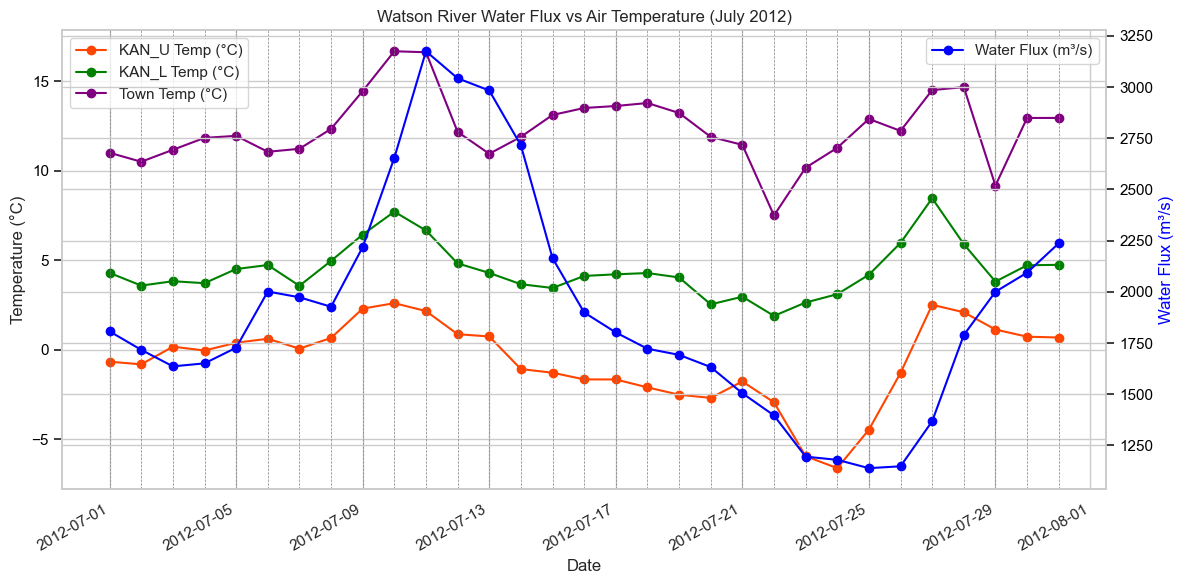

In [323]:
# watson river water flux compared to upper, lower, and in town air temperatures 

# --- AWS Data Loader ---
def open_aws_data(fileName):
    ds = xr.open_dataset(fileName)
    df = ds.copy().to_pandas()
    df['sw_net'] = df['dsr_cor'] - df['usr_cor']
    df['lw_net'] = df['dlr'] - df['ulr']
    df['rad_net'] = df['sw_net'] + df['lw_net']
    df['albedo'] = df['usr_cor'] / df['dsr_cor']
    return df

# --- Load AWS data ---
udf = open_aws_data("KAN_U_10min.nc")  # Upper site
ldf = open_aws_data("KAN_L_10min.nc")  # Lower site

# Resample July 2012 to daily averages
upper_july = udf['2012-07-01':'2012-07-31'].resample('D').mean()
lower_july = ldf['2012-07-01':'2012-07-31'].resample('D').mean()

# --- Load Watson River discharge data ---
watson_file = "Watson_River_discharge_(2006-2023)_hourly.csv"
df = pd.read_csv(watson_file)

july_flux = df[(df['Year'] == 2012) & (df['MonthOfYear'] == 7)].copy()
july_flux['Timestamp'] = pd.to_datetime(
    july_flux[['Year', 'MonthOfYear', 'DayOfMonth']].astype(str).agg('-'.join, axis=1)
    + ' ' + july_flux['HourOfDay(UTC)'].astype(str) + ':00'
)
july_flux.set_index('Timestamp', inplace=True)
daily_flux = july_flux['WaterFluxDiversOnly(m3/s)'].resample('D').mean()

# --- Load Kangerlussuaq town weather data ---
weather_file = "july_2012_Kanger_weather_data.csv"
weather_df = pd.read_csv(weather_file)
weather_df['Date'] = pd.to_datetime(weather_df['Date'] + ' 2012', format='%b %d %Y')
july_weather_df = weather_df[['Date', 'Temperature Avg (°F)']].copy()
july_weather_df.rename(columns={'Temperature Avg (°F)': 'AvgTemp(F)'}, inplace=True)
july_weather_df.set_index('Date', inplace=True)
july_weather_df['AvgTemp(C)'] = (july_weather_df['AvgTemp(F)'] - 32) * 5/9  # Convert to °C

# --- Plotting ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot all 3 temperature sources
ax1.plot(upper_july.index, upper_july['t_u'], marker='o', linestyle='-', color='orangered', label='KAN_U Temp (°C)')
ax1.plot(lower_july.index, lower_july['t_u'], marker='o', linestyle='-', color='green', label='KAN_L Temp (°C)')
ax1.plot(july_weather_df.index, july_weather_df['AvgTemp(C)'], marker='o', linestyle='-', color='purple', label='Town Temp (°C)')

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)')
ax1.tick_params(axis='y', labelcolor='black')

# Add vertical lines for each day
for date in upper_july.index:
    ax1.axvline(date, color='gray', linestyle='--', linewidth=0.5)

# Plot water flux on secondary axis
ax2 = ax1.twinx()
ax2.plot(daily_flux.index, daily_flux, marker='o', linestyle='-', color='blue', label='Water Flux (m³/s)')
ax2.set_ylabel('Water Flux (m³/s)', color='blue')
ax2.tick_params(axis='y', labelcolor='black')

# Title, formatting, legends
plt.title('Watson River Water Flux vs Air Temperature (July 2012)')
fig.autofmt_xdate()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

Watson River Water Flux vs. Air Temperature (July 2012):
* A correlation between all three temperature profiles and the increase in water flux that stated 7/8.
* There are consistencies between all three temperature profiles as far as their peaks 7/10. All three elevations started increasing in temp around 7/7, saw peak air temp at all three elevations around 7/10, we then saw peak discharge a day later, and subsequent temperature drops
* Looking at this graph is seems like there's a one day delay between temperature changes and then subsequent water flux 
* Does an ice sheet absorb enough energy/heat from the air to change the air temperature when it melts?
* Drop in temp seems like it causes drop in melt
* like if it takes heat to melt the surrounding ice, and the ice takes on that energy/sensible heat

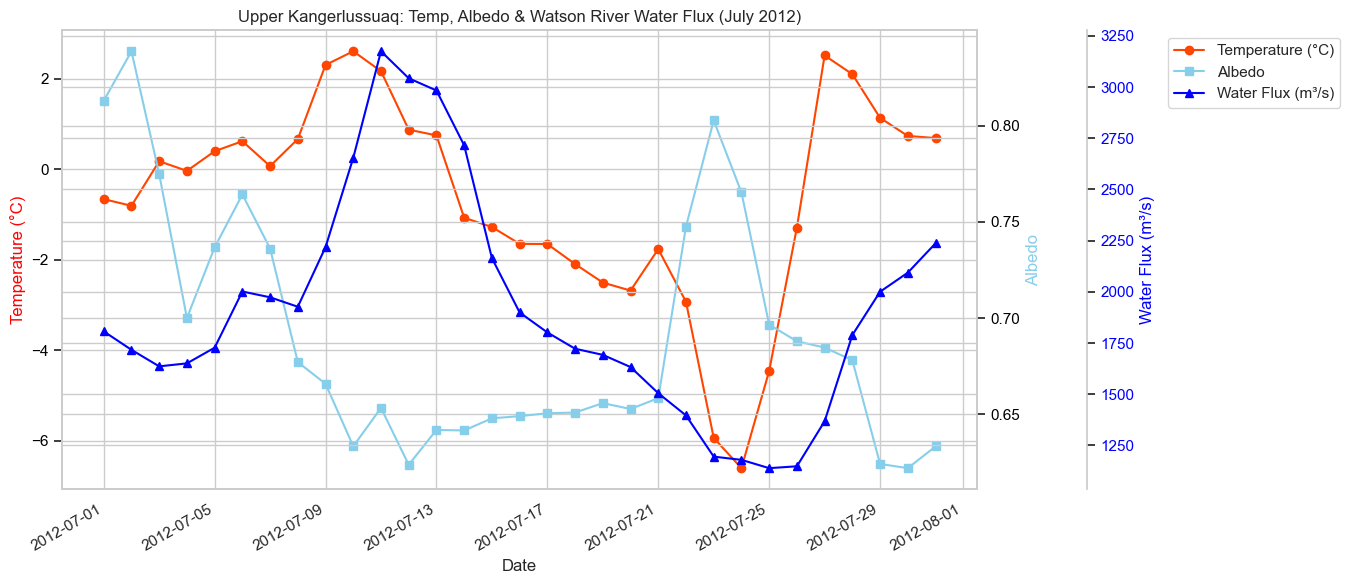

In [326]:
# Upper Kanger temps, albedo and Watson water fluxes
# for some reaosn I was thinking the albedo was the amount of longwave that was coming back from the ground and that cloud cover had a 
# big effect on that but I don't think that's correct? Its like the amount that the surface is melting and absorbing more energy right?
# does cloud cover affect it much? 

# --- 1. Resample Upper site data to daily averages for July 2012 ---
daily_avg_u = udf['2012-07-01':'2012-07-31'].resample('D').mean()

# --- 2. Prepare Watson River flux for July 2012 ---
july_flux = df[(df['Year'] == 2012) & (df['MonthOfYear'] == 7)].copy()
july_flux['Timestamp'] = pd.to_datetime(
    july_flux[['Year', 'MonthOfYear', 'DayOfMonth']].astype(str).agg('-'.join, axis=1)
    + ' ' + july_flux['HourOfDay(UTC)'].astype(str) + ':00'
)
july_flux.set_index('Timestamp', inplace=True)
daily_flux = july_flux['WaterFluxDiversOnly(m3/s)'].resample('D').mean()

# --- 3. Plotting ---
fig, ax1 = plt.subplots(figsize=(14, 6))

# Temperature (primary y-axis)
ax1.plot(daily_avg_u.index, daily_avg_u['t_u'], color='orangered', marker='o', label='Temperature (°C)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='red')
ax1.tick_params(axis='y', labelcolor='black')

# Albedo (secondary y-axis)
ax2 = ax1.twinx()
ax2.plot(daily_avg_u.index, daily_avg_u['albedo'], color='skyblue', marker='s', label='Albedo')
ax2.set_ylabel('Albedo', color='skyblue')
ax2.tick_params(axis='y', labelcolor='black')

# Water flux (third y-axis - offset right)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('axes', 1.12))  # offset the third y-axis
ax3.plot(daily_flux.index, daily_flux, color='blue', marker='^', label='Water Flux (m³/s)')
ax3.set_ylabel('Water Flux (m³/s)', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')

# Title and formatting
plt.title('Upper Kangerlussuaq: Temp, Albedo & Watson River Water Flux (July 2012)')
fig.autofmt_xdate()
plt.grid(True)

# Combine legends from all axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
plt.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper left', bbox_to_anchor=(1.2, 1.0))

plt.tight_layout()
plt.show()

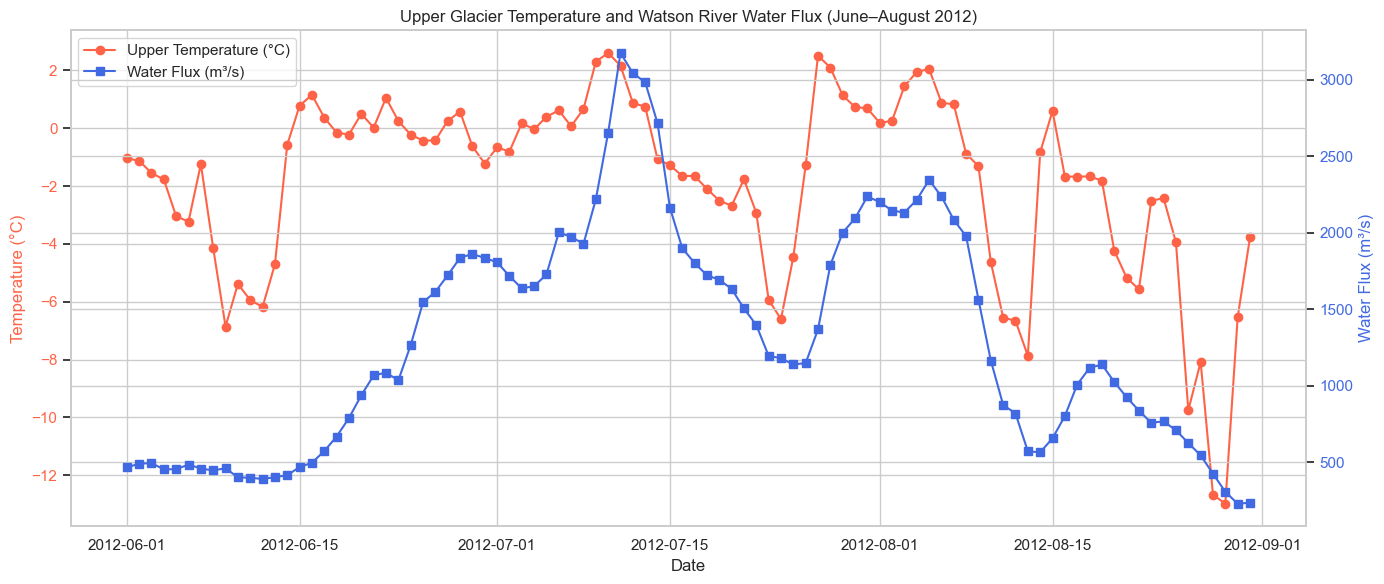

In [327]:
# **June and august temperature and melt from upper and lower**

# --- Load Watson River discharge data ---
watson_file = "Watson_River_discharge_(2006-2023)_hourly.csv"
df = pd.read_csv(watson_file)

# Create datetime index for Watson data
df['Timestamp'] = pd.to_datetime(
    df[['Year', 'MonthOfYear', 'DayOfMonth']].astype(str).agg('-'.join, axis=1)
    + ' ' + df['HourOfDay(UTC)'].astype(str) + ':00'
)
df.set_index('Timestamp', inplace=True)

# Filter for June to August 2012
flux_jja = df['2012-06-01':'2012-08-31']
daily_flux = flux_jja['WaterFluxDiversOnly(m3/s)'].resample('D').mean()

# --- Temperature from upper glacier AWS ---
temp_jja = udf['2012-06-01':'2012-08-31']
daily_temp = temp_jja['t_u'].resample('D').mean()

# --- Plotting ---
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot temperature
color1 = 'tomato'
ax1.plot(daily_temp.index, daily_temp, color=color1, label='Upper Temperature (°C)', marker='o')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Secondary y-axis for water flux
ax2 = ax1.twinx()
color2 = 'royalblue'
ax2.plot(daily_flux.index, daily_flux, color=color2, label='Water Flux (m³/s)', marker='s')
ax2.set_ylabel('Water Flux (m³/s)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Title and legend
plt.title('Upper Glacier Temperature and Watson River Water Flux (June–August 2012)')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

The thing that sticks out to me about this is the almost 1:1 relation of the upper air temp and water flux form the end of July to mid-August, that doesnt seem to happen frequently in the variables we have here

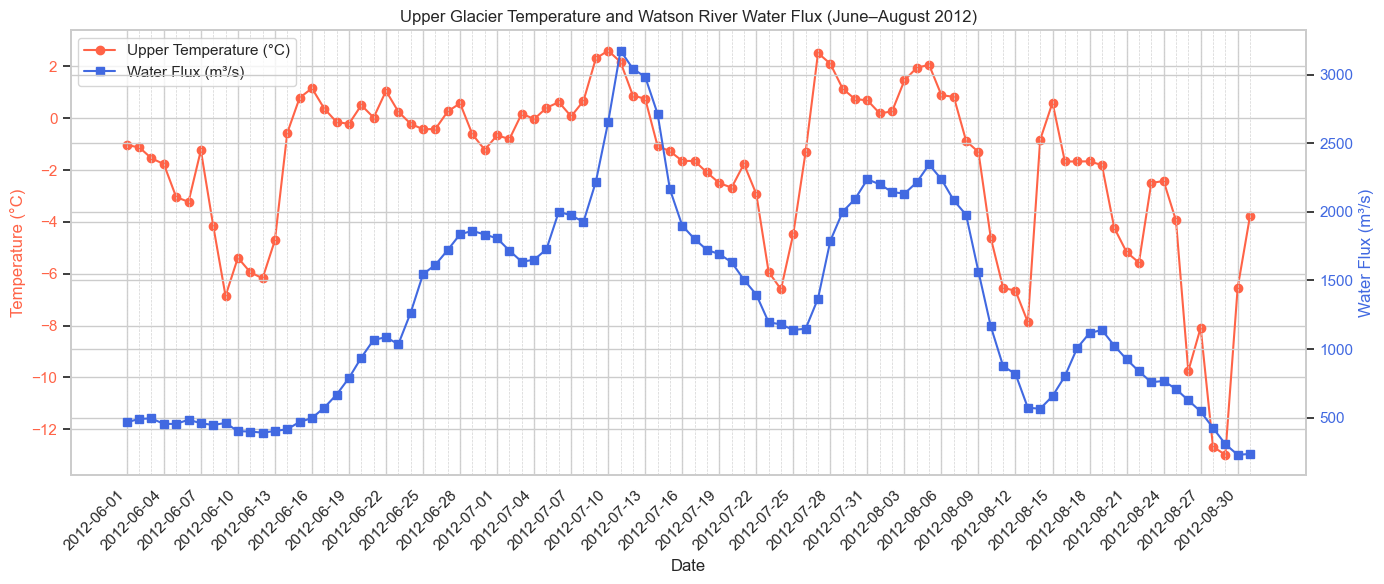

In [353]:
# --- Load Watson River discharge data ---
watson_file = "Watson_River_discharge_(2006-2023)_hourly.csv"
df = pd.read_csv(watson_file)

# Create datetime index for Watson data
df['Timestamp'] = pd.to_datetime(
    df[['Year', 'MonthOfYear', 'DayOfMonth']].astype(str).agg('-'.join, axis=1)
    + ' ' + df['HourOfDay(UTC)'].astype(str) + ':00'
)
df.set_index('Timestamp', inplace=True)

# Filter for June to August 2012
flux_jja = df['2012-06-01':'2012-08-31']
daily_flux = flux_jja['WaterFluxDiversOnly(m3/s)'].resample('D').mean()

# --- Temperature from upper glacier AWS ---
temp_jja = udf['2012-06-01':'2012-08-31']
daily_temp = temp_jja['t_u'].resample('D').mean()

# --- Plotting ---
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot temperature
color1 = 'tomato'
ax1.plot(daily_temp.index, daily_temp, color=color1, label='Upper Temperature (°C)', marker='o')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Add vertical lines and custom ticks
for date in daily_temp.index:
    ax1.axvline(date, color='lightgray', linestyle='--', linewidth=0.5)

# Custom x-tick labels: show full dates every 3rd day
xticks = daily_temp.index[::3]  # Take every 3rd day
xticklabels = [date.strftime('%Y-%m-%d') for date in xticks]  # Format the dates as 'YYYY-MM-DD'

ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels, rotation=45, ha='right')

# Secondary y-axis for water flux
ax2 = ax1.twinx()
color2 = 'royalblue'
ax2.plot(daily_flux.index, daily_flux, color=color2, label='Water Flux (m³/s)', marker='s')
ax2.set_ylabel('Water Flux (m³/s)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Title and legend
plt.title('Upper Glacier Temperature and Watson River Water Flux (June–August 2012)')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

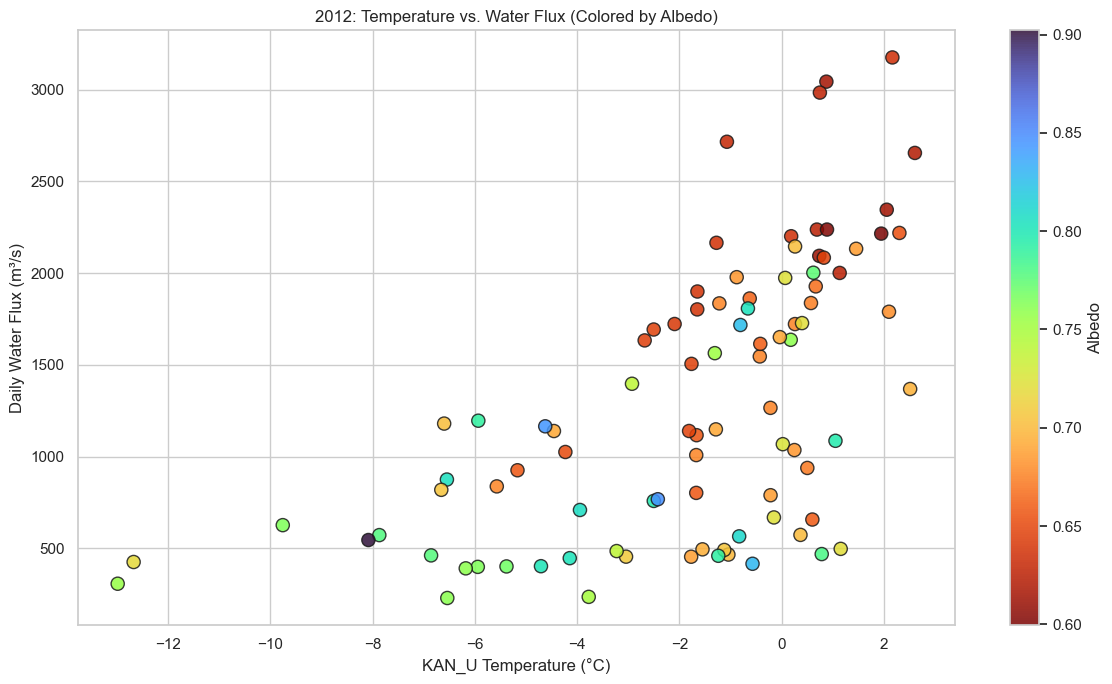

In [355]:
# I have literally no idea if this is correct or not
# how do you tell if the time scales match up correctly?

# --- STEP 1: Load KAN_U NetCDF file ---
ds = xr.open_dataset("KAN_U_10min.nc")

# Convert to pandas DataFrame
df_kan_u = ds[['t_u', 'albedo']].to_dataframe().reset_index()

# --- STEP 2: Resample to daily averages ---
df_kan_u.set_index('time', inplace=True)
df_kan_u_daily = df_kan_u.resample('D').mean()
df_kan_u_daily = df_kan_u_daily['2012-06-01':'2012-08-31'].rename(columns={'t_u': 'Temperature', 'albedo': 'Albedo'})

# --- STEP 3: Process Watson River discharge hourly data ---
watson_file = "Watson_River_discharge_(2006-2023)_hourly.csv"
df = pd.read_csv(watson_file)

# Convert date parts to datetime
df['Timestamp'] = pd.to_datetime(
    df[['Year', 'MonthOfYear', 'DayOfMonth']].astype(str).agg('-'.join, axis=1)
    + ' ' + df['HourOfDay(UTC)'].astype(str) + ':00'
)
df.set_index('Timestamp', inplace=True)

# Filter for JJA 2012 and compute daily average flux
flux_jja = df['2012-06-01':'2012-08-31']
daily_flux = flux_jja['WaterFluxDiversOnly(m3/s)'].resample('D').mean().rename("Flux")

# --- STEP 4: Merge all into a single DataFrame ---
plot_df = pd.concat([df_kan_u_daily, daily_flux], axis=1).dropna()

# --- STEP 5: Scatter plot with color-coded albedo ---
plt.figure(figsize=(12, 7))
sc = plt.scatter(
    plot_df['Temperature'], 
    plot_df['Flux'], 
    c=plot_df['Albedo'], 
    cmap='turbo_r', 
    edgecolor='k',
    alpha=0.85,
    s=90
)

plt.colorbar(sc, label='Albedo')
plt.xlabel('KAN_U Temperature (°C)')
plt.ylabel('Daily Water Flux (m³/s)')
plt.title('2012: Temperature vs. Water Flux (Colored by Albedo)')
plt.grid(True)
plt.tight_layout()
plt.show()


Daily water flux being shown in association with lower albedo and higher temperatures

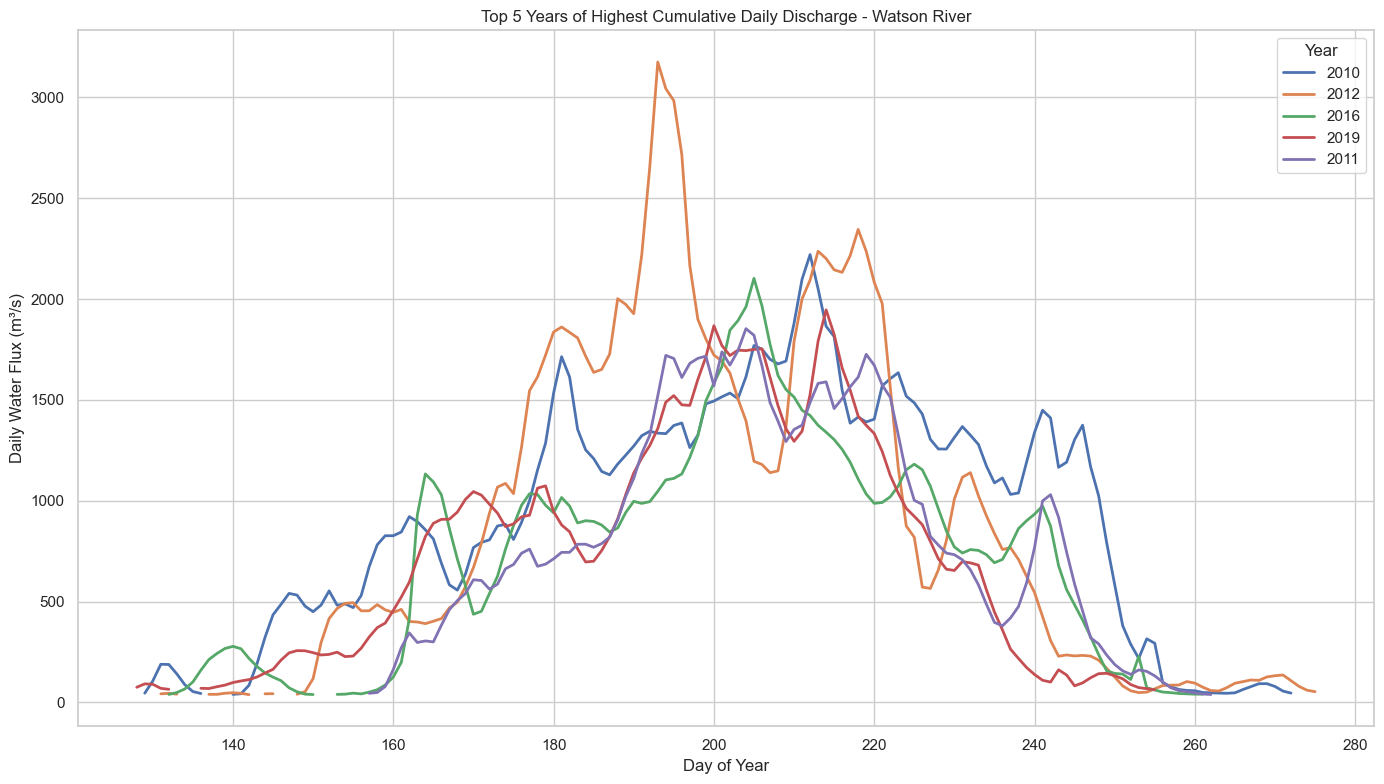

In [349]:
# double check that these values and years are correct 

# --- STEP 1: Load Watson River hourly data ---
watson_file = "Watson_River_discharge_(2006-2023)_hourly.csv"
df = pd.read_csv(watson_file)

# Create datetime index
df['Timestamp'] = pd.to_datetime(
    df[['Year', 'MonthOfYear', 'DayOfMonth']].astype(str).agg('-'.join, axis=1)
    + ' ' + df['HourOfDay(UTC)'].astype(str) + ':00'
)
df.set_index('Timestamp', inplace=True)

# --- STEP 2: Filter out invalid and non-positive values ---
df = df[df['WaterFluxDiversOnly(m3/s)'] > 0]  # remove -999 and 0

# --- STEP 3: Convert to daily average discharge ---
df['DayOfYear'] = df.index.dayofyear
df['Year'] = df.index.year

daily_flux = df['WaterFluxDiversOnly(m3/s)'].resample('D').mean().to_frame(name='DailyFlux')
daily_flux['Year'] = daily_flux.index.year
daily_flux['DayOfYear'] = daily_flux.index.dayofyear

# --- STEP 4: Compute total discharge per year ---
yearly_totals = daily_flux.groupby('Year')['DailyFlux'].sum().sort_values(ascending=False)
top5_years = yearly_totals.head(5).index.tolist()

# --- STEP 5: Plot daily discharge for top 5 years ---
plt.figure(figsize=(14, 8))

for year in top5_years:
    year_data = daily_flux[daily_flux['Year'] == year]
    plt.plot(
        year_data['DayOfYear'], 
        year_data['DailyFlux'], 
        label=str(year), 
        linewidth=2
    )

plt.xlabel('Day of Year')
plt.ylabel('Daily Water Flux (m³/s)')
plt.title('Top 5 Years of Highest Cumulative Daily Discharge - Watson River')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()


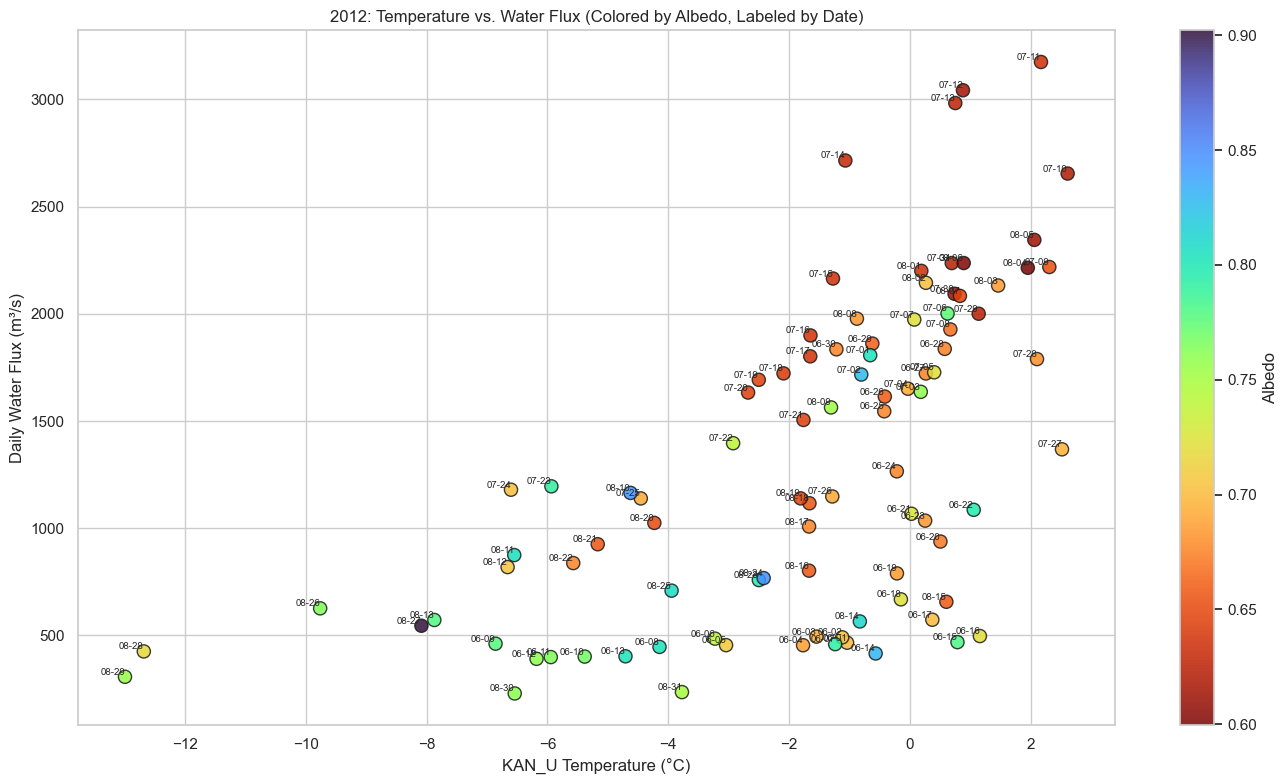

In [357]:
# --- STEP 1: Load KAN_U NetCDF file ---
ds = xr.open_dataset("KAN_U_10min.nc")
df_kan_u = ds[['t_u', 'albedo']].to_dataframe().reset_index()

# --- STEP 2: Resample KAN_U to daily averages ---
df_kan_u.set_index('time', inplace=True)
df_kan_u_daily = df_kan_u.resample('D').mean()
df_kan_u_daily = df_kan_u_daily['2012-06-01':'2012-08-31']
df_kan_u_daily.rename(columns={'t_u': 'Temperature', 'albedo': 'Albedo'}, inplace=True)

# --- STEP 3: Load and process Watson River discharge data ---
watson_file = "Watson_River_discharge_(2006-2023)_hourly.csv"
df = pd.read_csv(watson_file)

# Create datetime index
df['Timestamp'] = pd.to_datetime(
    df[['Year', 'MonthOfYear', 'DayOfMonth']].astype(str).agg('-'.join, axis=1)
    + ' ' + df['HourOfDay(UTC)'].astype(str) + ':00'
)
df.set_index('Timestamp', inplace=True)

# Filter for JJA 2012 and compute daily average flux
flux_jja = df['2012-06-01':'2012-08-31']
daily_flux = flux_jja['WaterFluxDiversOnly(m3/s)'].resample('D').mean().rename("Flux")

# --- STEP 4: Merge and prepare for plotting ---
plot_df = pd.concat([df_kan_u_daily, daily_flux], axis=1).dropna()
plot_df.index.name = 'Date'
plot_df.reset_index(inplace=True)

# --- STEP 5: Scatter plot with albedo coloring and date labels ---
plt.figure(figsize=(14, 8))
sc = plt.scatter(
    plot_df['Temperature'], 
    plot_df['Flux'], 
    c=plot_df['Albedo'], 
    cmap='turbo_r',       # Inverted colormap: low albedo = red, high = purple
    edgecolor='k', 
    alpha=0.85,
    s=90                    # Larger marker size
)

# Add mm-dd date labels for each point
for _, row in plot_df.iterrows():
    date_str = row['Date'].strftime('%m-%d')
    plt.text(row['Temperature'], row['Flux'], date_str, fontsize=7, ha='right', va='bottom')

plt.colorbar(sc, label='Albedo')
plt.xlabel('KAN_U Temperature (°C)')
plt.ylabel('Daily Water Flux (m³/s)')
plt.title('2012: Temperature vs. Water Flux (Colored by Albedo, Labeled by Date)')
plt.grid(True)
plt.tight_layout()
plt.show()